https://archive.ics.uci.edu/dataset/52/ionosphere

In [ ]:
import pandas as pd
from IPython.display import display
from tensorflow import keras
from tensorflow.keras import layers

ion = pd.read_csv("./Data/ionosphere.data", header= None)
display(ion.head())

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [ ]:
columnNames = [
    "V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "V10", 
    "V11", "V12", "V13", "V14", "V15", "V16", "V17", "V18", "V19", "V20", 
    "V21", "V22", "V23", "V24", "V25", "V26", "V27", "V28", "V29", "V30", 
    "V31", "V32", "V33", "V34", "Class"
]

# Forçando os nomes de coluna no DataFrame
ion.columns = columnNames

In [4]:
df = ion.copy()
df['Class'] = df['Class'].map({'g': 0, 'b': 1})

df_train = df.sample(frac=0.7, random_state=0)
df_valid = df.drop(df_train.index)

max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)

df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)
df_train.dropna(axis=1, inplace=True) # drop the empty feature in column 2
df_valid.dropna(axis=1, inplace=True)

X_train = df_train.drop('Class', axis=1)
X_valid = df_valid.drop('Class', axis=1)
y_train = df_train['Class']
y_valid = df_valid['Class']

We'll define our model just like we did for the regression tasks, with one exception. In the final layer include a 'sigmoid' activation so that the model will produce class probabilities.

In [6]:
model = keras.Sequential([
    layers.Input(shape=[33]),
    layers.Dense(4, activation='relu'),
    layers.Dense(4, activation='relu'),    
    layers.Dense(1, activation='sigmoid'),
])

Add the cross-entropy loss and accuracy metric to the model with its compile method. For two-class problems, be sure to use 'binary' versions. 

In [7]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [8]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0, # hide the output because we have so many epochs
)

Best Validation Loss: 0.3595
Best Validation Accuracy: 0.8762


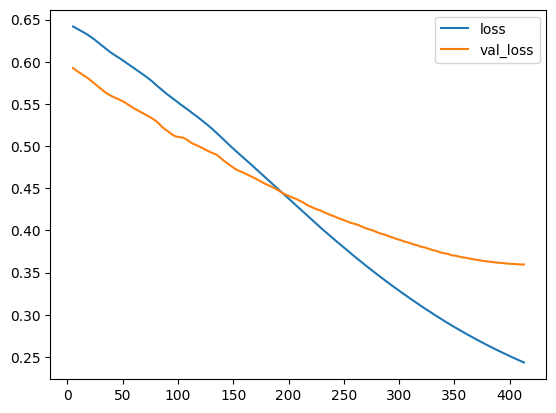

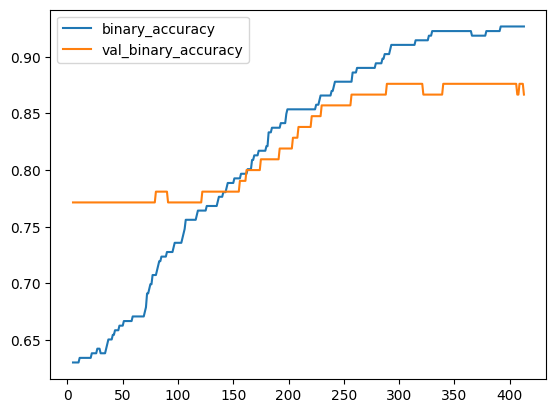

In [9]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))